# Assignment 2 - Logistic Regression & Naive Bayes - A20503736 Girish Rajani

Due by 11:59pm, Feb 24, 2023

## Theory Questions (Full points: 40, each question 4 points)

1. Explain the importance of setting up learning rate in the gradient descent based methods. 

**Answer:**

In gradient descent, setting up a learning rate is important because it denotes the rate at which the gradient descent algorithm updates and gets closer to finding the optimal weights that will reduce the loss. 

It is important to select the learning rate wisely because if the learning rate is too large, the step size will be too large which can cause the model to converge too fast and miss the optimal point which may increase the loss function instead of minimizing it.

If the learning rate is too small, it will take a very large number of epochs to reach the local minima point and minimze the loss.

2. What is the stochastic gradient descent? Why do we need stochastic gradient descent?

**Answer:**

In machine learning, stochastic gradient descent is very similar to gradient descent in that it is an optimizer that minimzes the loss by finding the optimal weights of the model. SGD helps solve the following problem with gradient descent:

For every epoch, gradient descent algorithm looks through the entire training dataset when making an update. This operation can get very expensive to perform for very large datasets.

To solve this, SGD takes a random batch/sample size of the training set and looks at that when making an update per iteration. This makes SGD a lot faster.

3. Explain the reasons to perform feature scaling.

**Answer:**

Normally, if our data is within a large scale/range, the machine learning model would be biased, in that it would consider the higher values as a greater weight and would consider the smaller values as less weight. 

In the event when our values are of equal importance, whether it be high or low, we perform feature scaling to bring these values within the same scale which can increase the performance of the model.

4. What is the probabilistic generative model?

**Answer:**

The probabilistic generative model learns the probability distribution for each class from the training data. This means that it learns the distribution of the input x and it's corresponding classes y. 

It then uses this probability distribution to predict the probability that an input x belongs to each class then classifies that feature into the label that has the highest probability.

5. Explain how we perform maximum likelihood.

**Answer:**

Maximum likelihood estimation (MLE) tries to find parameters that maximize the likelihood function. This explains how well the model performs since it measures the probability that a sample belongs to a class given the model weights.

We perform MLE by doing the following: 

1) We choose the likelihood function that is relevant to our model for the given problem.

2) We take the log likelihood of the chosen likelihood funcion to make the computation simpler

3) We take the derivative of the log likelihood function w.r.t the weights of the model

4) Find the model weights that will maximize the likelihood function and use that to find the maximum probability for predicting an input x given a class C

6. Explain the reasons about using cross entropy loss in logistic regression.

**Answer:**

Cross entropy loss is a very popular loss function in logistic regression. It measures the distance between the prediction (y_hat) and the true value (y). This loss is measured between 0 and 1, where we want to get our model as close to 0. 

The goal of cross entropy is to minimize the loss during training for logistic regression. Cross entropy loss also helps to find the global minimum point easier since the loss results in a convex loss function.

7. Explain the differences between discriminative and generative model.


**Answer:**

Discriminative model (also known as conditional models) learns the decision boundaries between classes from the input x. It learns to map the input x to the class which means that this model is used to separate one class from another. Discriminative models can learn complex decisions which generative models cannot do, is more robust to outliers and is less expensive. However, they may need to overfitting when there is a large dataset. Some examples of discriminative models are Logistic Regression, Scalar Vector Machines, and Neural Networks.

Generative models learns the probability distribution for each class from the training data which can be used to generate new data similar to the existing training data. This is possible because these models learn the relationship between the input x and their corresponding classes. This is helpful for tasks such as data augmentation and likelihood estimate. However, they do require a large amount of data and can become computationally expensive. Some examples of generative models are Naive Bayes, Bayesian networks, and Markov random fields

8. What is N-folds? Explain the reasons why we need N-folds. 

**Answer:**

N-fold cross validation divides the data into N equal subsets. One subset is used as the testing set while the remaining N-1 folds is used as training. This process is repeated for each unique fold. 

The reason for performing N-fold cross validation is that at some given point, all samples in the training data would have also been used for testing which will result in a better model evaluation if we have limited data. This also helps avoid overfitting.

9. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.12

**Answer:**

$ \frac {d\sigma}{da} =\frac {e^{−a}} {(1 + e^{-a})^2}$

$ = \sigma(a) [\frac {e^{−a}} {1 + e^{-a}} ]$

$ = \sigma(a) [ \frac {1 + e^{−a}} {1 + e^{-a}} - \frac {1} {1 + e^{-a}} ]$

$ = \sigma(a)(1 − \sigma(a))$

$ = \sigma(1 − \sigma)$

10. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.13

**Answer:**

$\frac {\partial E} {\partial y_n} = \frac{1 − t_n}{1 − y_n} - \frac {t_n}{y_n}$

$ = \frac {y_n(1 − t_n) − t_n(1 − y_n)}{y_n(1 − y_n)}$

$ = \frac {y_n − y_n t_n − t_n + y_n t_n}{y_n(1 − y_n)}$

$ = \frac {y_n − t_n}{y_n(1 − y_n)}$

## Programming Questions (Full points: 60, each question 30 points)

In [1996]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# load dataset
x, y = load_wine(return_X_y=True)

### - Logistic Regression

0. train_test_split (Done in the below cell)

We **randomly** split data into train and test set. The number of training data and testing data is 100 and 30, respectively. Do not modify the split data. You need to use training data to train your model and obtain an optimal solution. Finally, using your model with the optimal solution to predict the testing data. 

In [1997]:
# Do not edit the codes in this cell
# We split train and test data for logistic regression function

test_lists = [0, 4, 5, 7, 13, 15, 19, 27, 28, 30, 31, 34, 39, 47, 63, 74, 78, 83, 90, 92, 95, 97, 103, 113, 119, 122, 123, 125, 126, 127]

x = x[:130, :]
y = y[:130]

# training data: you can use it to training your model.
train_x = np.array([sub_x for index, sub_x in enumerate(x) if index not in test_lists])
train_y = np.array([sub_y for index, sub_y in enumerate(y) if index not in test_lists])

# testing data: ONLY use it to measure your model, do NOT use during training.
test_x = np.array([sub_x for index, sub_x in enumerate(x) if index in test_lists])
test_y = np.array([sub_y for index, sub_y in enumerate(y) if index in test_lists])

In the assignment 2, you have more freedom on your programming design. In this part, you are going to implement your own Logistic Regression function. You need to implement logistic regression with stochastic gradient descent from scratch. The required functions are listed below. You can add more functions as you need. **No library versions of logistic regression are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. sigmoid

The core of logistic regression

4. predict

Predict an output value for a given x with a set of coefficients. 

5. accurate

Calculate accuracy percentage of the predictions.

6. coef_gd

Estimate logistic regression coefficients using **vanilla gradient descent**. Using **the cross entropy loss**. Carefully choose learning rate and epochs values.

7. draw_model

a) Plot the both training loss and validation loss for each epochs.

b) Plot the both training accuracy and validation accuracy for each epochs. 

8. predict the testing data

Use your pre-trained model to predict the testing data. Print out your **testing accurate**. Is it good? If not, analyze the reason in short and modify your code to improve.  


In [1998]:
len(train_x)


100

In [1999]:
#train_val_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, train_size=0.8)


In [2000]:
print("Shape of training dataset:",train_x.shape)
print("Shape of validation dataset:",val_x.shape)

print("\nFirst unnormalized training sample:\n",train_x[0])
print("\nFirst unnormalized validation sample:\n",val_x[0])

Shape of training dataset: (80, 13)
Shape of validation dataset: (20, 13)

First unnormalized training sample:
 [1.367e+01 1.250e+00 1.920e+00 1.800e+01 9.400e+01 2.100e+00 1.790e+00
 3.200e-01 7.300e-01 3.800e+00 1.230e+00 2.460e+00 6.300e+02]

First unnormalized validation sample:
 [1.165e+01 1.670e+00 2.620e+00 2.600e+01 8.800e+01 1.920e+00 1.610e+00
 4.000e-01 1.340e+00 2.600e+00 1.360e+00 3.210e+00 5.620e+02]


In [2001]:
#Normalization

train_x = preprocessing.normalize(train_x)
val_x = preprocessing.normalize(val_x)
test_x = preprocessing.normalize(test_x)
print("First normalized training sample:\n",train_x[0])
print("\nFirst normalized validation sample:\n",val_x[0])

First normalized training sample:
 [2.14464061e-02 1.96108322e-03 3.01222382e-03 2.82395984e-02
 1.47473458e-01 3.29461981e-03 2.80827117e-03 5.02037304e-04
 1.14527260e-03 5.96169299e-03 1.92970589e-03 3.85941178e-03
 9.88385943e-01]

First normalized validation sample:
 [2.04531901e-02 2.93191653e-03 4.59977323e-03 4.56466046e-02
 1.54496200e-01 3.37082619e-03 2.82657821e-03 7.02255456e-04
 2.35255578e-03 4.56466046e-03 2.38766855e-03 5.63560003e-03
 9.86668915e-01]


In [2002]:
#Sigmoid activation function

def sigmoid(theta, train_x):
    x = np.dot(theta, train_x.T)
    return 1/(1+np.exp(-x))

In [2003]:
#Predict function
def predict(theta, train_x):
    y_hat = sigmoid(theta, train_x)
    prediction = [1 if i > 0.5 else 0 for i in y_hat]    
    return prediction

In [2004]:
# calculate accuracy
def accurate(predict, train_y):
    accuracy_percentage = (train_y == predict).mean()
    return accuracy_percentage

In [2005]:
#Cross Entropy Loss function

def loss_function(theta, train_x, train_y):
    n = len(train_x)
    y_hat = sigmoid(theta, train_x)
    loss = -1/n * np.sum((train_y * np.log(y_hat)) + (1- train_y) * np.log(1-y_hat))
    return loss


In [2006]:
lr = 0.1
epochs = 5000
theta = np.zeros(train_x.shape[1])

# gradient descent to find the optimal fit
def coef_gd(theta, train_x, train_y, val_x, val_y, lr, epochs):
    loss_history = []
    train_acc = []
    loss_history_val = []
    val_acc = []
    
    for epoch in range(epochs):
        n = len(train_x)

        #compute the training prediction error
        y_hat = sigmoid(train_x, theta)
        error = y_hat - train_y

        #Update the weights using gradient descent update rule
        gradient = np.dot(train_x.T, error)/n
        theta -= lr*gradient

        #Compute training loss using cross entropy loss
        train_loss = -1/n * np.sum((train_y * np.log(y_hat)) + (1- train_y) * np.log(1-y_hat))

        #Compute validation loss using cross entropy loss
        y_hat_val = sigmoid(val_x, theta)
        val_loss = -1/n * np.sum((val_y * np.log(y_hat_val)) + (1- val_y) * np.log(1-y_hat_val))

        #Find training and validation accuracy
        train_acc.append(accurate(predict(theta, train_x), train_y))
        val_acc.append(accurate(predict(theta, val_x), val_y))

        loss_history.append(train_loss)
        loss_history_val.append(val_loss)
    return theta, loss_history, loss_history_val, train_acc, val_acc


In [2007]:
#Call gradient descent function
final_theta, loss_history, loss_history_val, train_acc, val_acc = coef_gd(theta, train_x, train_y, val_x, val_y, lr, epochs)

#Perform prediction on validation data using optimized weights obtained from gradient descent
y_hat = predict(final_theta, val_x)

#Compute the accuracy of the model on validation data
accuracy = accurate(y_hat, val_y)

print("Validation accuracy: {:.2f}".format(accuracy))

Validation accuracy: 0.90


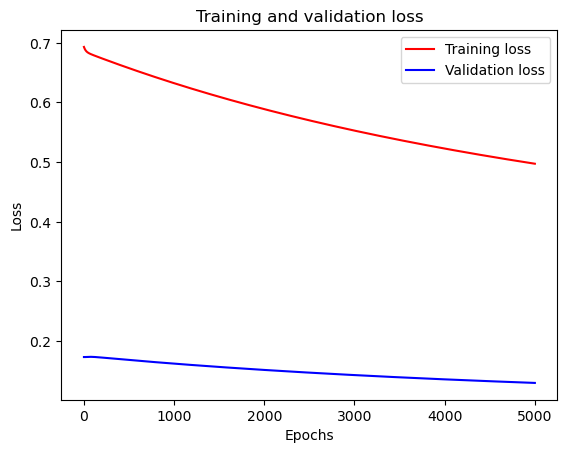

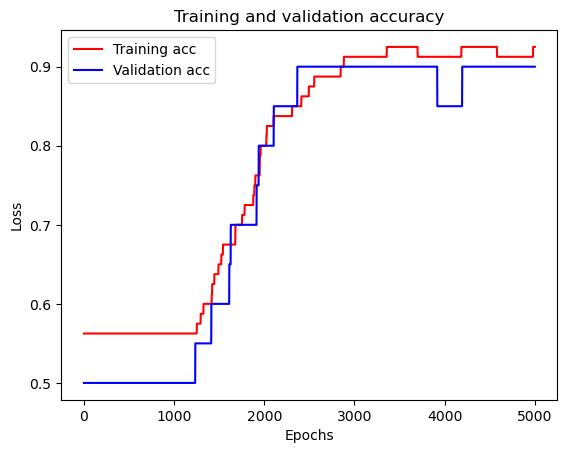

In [2008]:
#Plot training and validation loss graph as a function of epochs
epochs = range(1, len(loss_history) + 1)
plt.plot(epochs, loss_history, 'r', label='Training loss')
plt.plot(epochs, loss_history_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy graph as a function of epochs
plt.clf()
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2011]:
#8. Predict the testing data
y_hat_test = predict(final_theta, test_x)

final_test_accuracy = accurate(y_hat_test, test_y)

print("Test accuracy: {:.2f}".format(final_test_accuracy))

Test accuracy: 0.87


C:\Users\giris\AppData\Local\Temp\ipykernel_28940\4168197274.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [ ]:
'''
From above, we can see that the accuracy on unseen test data is 87%
This means that the model has performed very well because the accuracy
on validation data was 90% which concludes that the model generalizes well to new unseen data
'''


### - Naive Bayes Classifier

In this part, you are going to implement your own naive bayes classifier. 
You need to implement naive bayes classifier from scratch **using the training data of wine datasets train_x and train_y**. The required functions are listed below. You can add more functions as you need. **No library versions of naive bayes classifier are allowed**. 
_________

1. train_val_split

**Randomly** split training data into train and val set. 80% of the training data will be the train set and 20% of the training data will be the val set.

2. normalization (data preprocessing)

You should normalize all data for each attribute firstly. 

3. cross_validation_split

**Randomly** split data into 5 folds.


4. predict

Predict the class label for a given x. 

5. accurate

Calculate accuracy percentage of the predictions. Remember to average the results of k folds

6. gaussian_probability

Calculate the Gaussian probability distribution function for the given x. 

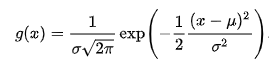


5. class_probability

Calculate the probabilities of predicting each class for a given x using naive bayes algorithm. Be aware that we have multiple input variables. And you may want to use gaussian_probability function here.

*Print out your accuracy result. Is it good? If not, analyze the reason in short. *


In [2047]:
from sklearn.datasets import load_wine
import numpy as np

#Load dataset
wine = load_wine()
test_size = 0.2

indices = np.arange(len(wine.data))
np.random.seed(5)
np.random.shuffle(indices)
split_index = int(len(wine.data) * (1 - test_size))

#Split the loaded dataset into training and testing set
train_idx, test_idx = indices[:split_index], indices[split_index:]
X_train, y_train = wine.data[train_idx], wine.target[train_idx]
X_test, y_test = wine.data[test_idx], wine.target[test_idx]

#Normalize data
class Normalize:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

feature_scaling = Normalize()
X_train = feature_scaling.fit_transform(X_train)
X_test = feature_scaling.transform(X_test)

class Naive_Bayes_Classifier:
    def __init__(self):
        self.class_priors_ = None
        self.means_ = None
        self.variances_ = None

    def fit(self, X, y):
        self.class_priors_ = np.bincount(y) / len(y)
        self.means_ = np.array([X[y == i].mean(axis=0) for i in range(len(np.unique(y)))])
        self.variances_ = np.array([X[y == i].var(axis=0) for i in range(len(np.unique(y)))])
   
    #Function to perform predict
    def predict(self, X):
        posteriors = []
        for i in range(len(np.unique(y_train))):
            prior = np.log(self.class_priors_[i])
            mean = self.means_[i]
            variance = self.variances_[i]
            likelihood = np.sum(np.log((1/np.sqrt(2*np.pi*variance)) * np.exp(-(X-mean)**2/(2*variance))), axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        return np.argmax(posteriors, axis=0)
    
   #gaussian_probability
    def gaussian_probability(self, x, mean, var):
        exponent = np.exp(-(x-mean)**2 / (2*var))
        return (1 / np.sqrt(2*np.pi*var)) * exponent

gaussian = Naive_Bayes_Classifier()
accuracy_hist = []
# 3. Cross_Validation_Split
folds = 5
size_of_fold = X_train.shape[0] // folds

for fold_number in range(folds):
    #Find starting and ending folds
    fold_strt = fold_number * size_of_fold
    fold_end = (fold_number + 1) * size_of_fold

    #Perform n fold cross validation
    X_train_crossval = np.concatenate((X_train[:fold_strt], X_train[fold_end:]), axis=0)
    y_train_crossval = np.concatenate((y_train[:fold_strt], y_train[fold_end:]), axis=0)
    X_val_crossval = X_train[fold_strt:fold_end]
    y_val_crossval = y_train[fold_strt:fold_end]

    #fit the cross validation data and perform prediction
    gaussian.fit(X_train_crossval, y_train_crossval)
    y_pred_crossval = gaussian.predict(X_val_crossval)

    #Calculate accuracy percentage of the predictions
    accurate = (y_pred_crossval == y_val_crossval).mean()
    accuracy_hist.append(accurate)
    print(f"Fold {fold_number+1} Accuracy: {accurate:.2f}")

#Print average accuracy of all folds
print(f"Average accuracy: {np.mean(accuracy_hist):.2f}")

#Calculate class_probability
for i in range(len(np.unique(y_train))):
    mean = gaussian.means_[i]
    var = gaussian.variances_[i]
    gaussian_probability_hist = []
    for j in range(X_test.shape[1]):
        prob = gaussian.gaussian_probability(X_test[:,j], mean[j], var[j])
        gaussian_probability_hist.append(prob)
    gaussian_probability_hist = np.prod(gaussian_probability_hist, axis=0)
    print(f"Class {i} Gaussian probability: {gaussian_probability_hist.mean():.2e}")


Fold 1 Accuracy: 0.89
Fold 2 Accuracy: 0.96
Fold 3 Accuracy: 0.93
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 1.00
Average accuracy: 0.96
Class 0 Gaussian probability: 5.40e-06
Class 1 Gaussian probability: 1.41e-06
Class 2 Gaussian probability: 2.58e-06


In [ ]:
#From above, we can see that the average accuracy of all folds is 96% which shows that the model performs very well
#Additionally, the class with the lowest gaussian probability is Class 1 which means that the other two classes have a higher probability of a sample belonging to one of those classes.